In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import pickle
import tensorflow as tf
""
from IPython.display import display 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### load images

In [3]:
img_name = glob.glob('../sample_image/pracimages/org/*.png')
img_name.sort()
img_name

['../sample_image/pracimages/org/01_113.png',
 '../sample_image/pracimages/org/02_114.png',
 '../sample_image/pracimages/org/03_115.png',
 '../sample_image/pracimages/org/04_115.png',
 '../sample_image/pracimages/org/05_118.png',
 '../sample_image/pracimages/org/06_120.png',
 '../sample_image/pracimages/org/07_123.png',
 '../sample_image/pracimages/org/08_113.png',
 '../sample_image/pracimages/org/09_114.png',
 '../sample_image/pracimages/org/10_115.png',
 '../sample_image/pracimages/org/11_115.png',
 '../sample_image/pracimages/org/12_118.png',
 '../sample_image/pracimages/org/13_120.png',
 '../sample_image/pracimages/org/14_123.png',
 '../sample_image/pracimages/org/15_113.png',
 '../sample_image/pracimages/org/16_114.png',
 '../sample_image/pracimages/org/17_115.png',
 '../sample_image/pracimages/org/18_116.png',
 '../sample_image/pracimages/org/19_118.png',
 '../sample_image/pracimages/org/20_120.png',
 '../sample_image/pracimages/org/21_123.png',
 '../sample_image/pracimages/org/2

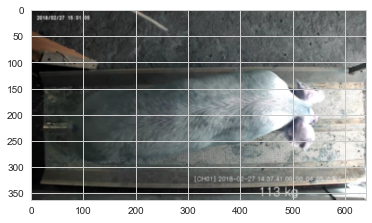

In [4]:
pid = []## -> pigs` ids
weight = []  ## -> target 
images = []
for i, img in enumerate(img_name):
    pid.append("p" + img_name[i][31:33])
    weight.append(img_name[i][34:37])
    
    img = cv2.imread(img)
    if i % 100 == 0:
        plt.imshow(img, interpolation='bicubic')
        plt.show()
    images.append(img)
    
weight = np.array(weight).astype(int)

### crop the images

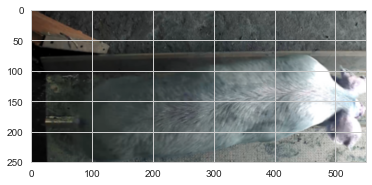

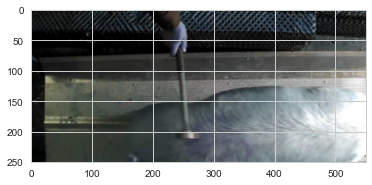

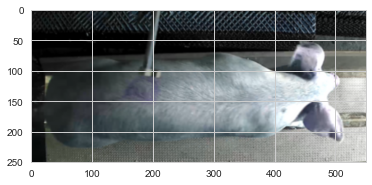

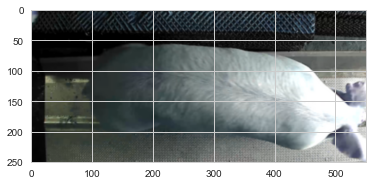

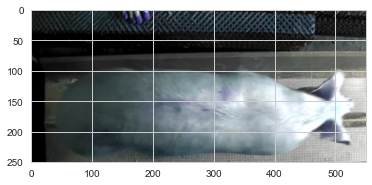

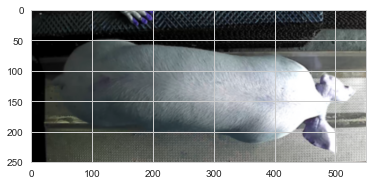

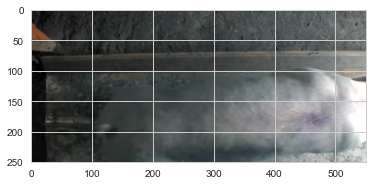

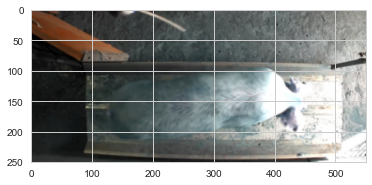

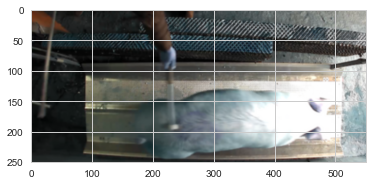

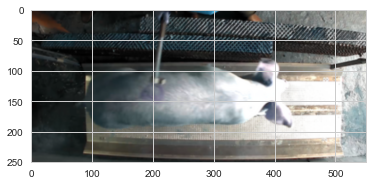

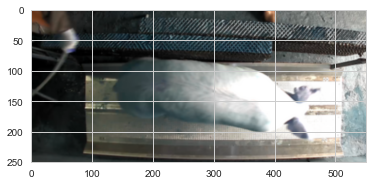

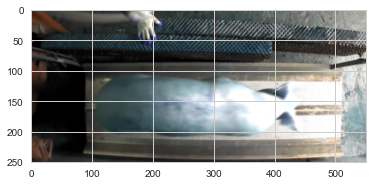

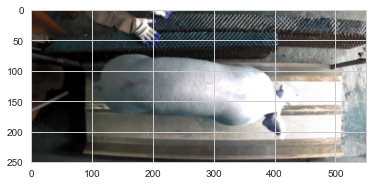

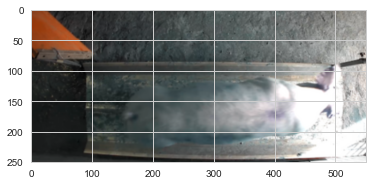

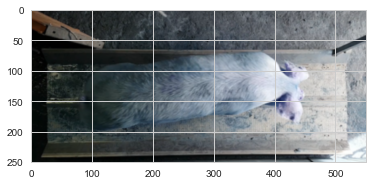

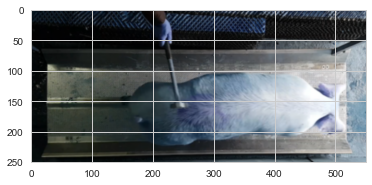

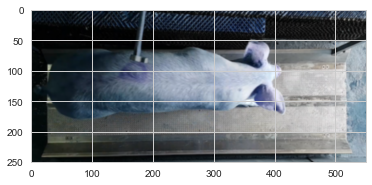

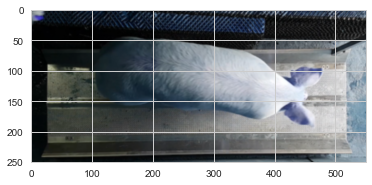

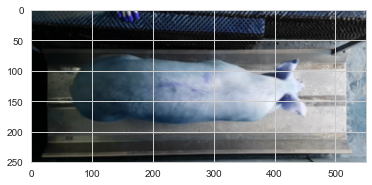

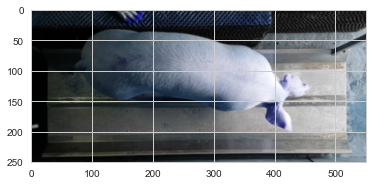

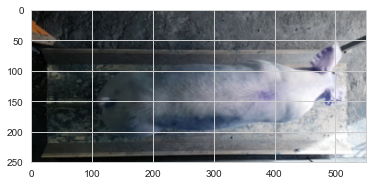

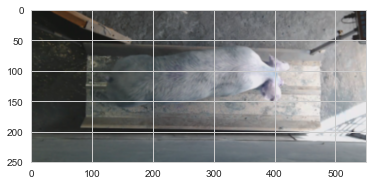

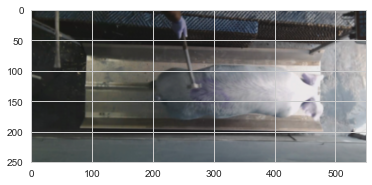

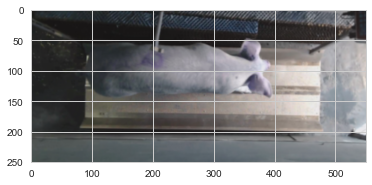

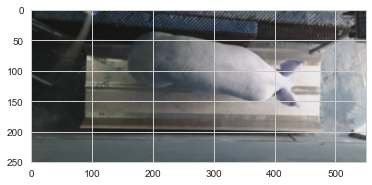

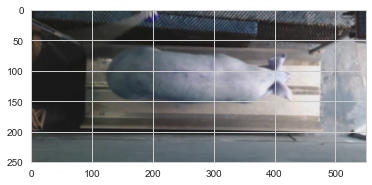

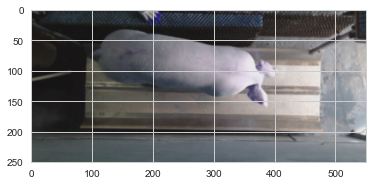

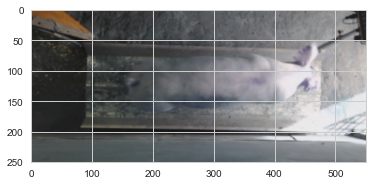

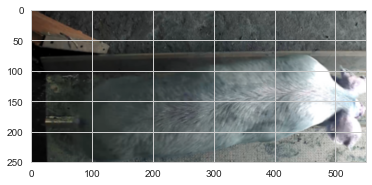

In [5]:
crop_img = []
top = 40
left = 0
for img in images:
    img = img[top:top+250, left:left+550]
    plt.imshow(img, interpolation='bicubic')
    plt.show()
    crop_img.append(img)

# make pickle 
with open("../pickle/org_crop_img.bin", 'wb') as f:
    pickle.dump(crop_img, f)
del images, crop_img
# read pickle file
with open("../pickle/org_crop_img.bin", "rb") as f:
    crop_img = pickle.load(f)
    

for i, img in enumerate(crop_img):
    if i % 100 == 0:
        plt.imshow(img, interpolation='bicubic')
        plt.show()

### Store with labels 

In [6]:
df = pd.DataFrame(data={'pid': pid, 'weight': weight, 'crop_images':crop_img})
df.sort_values('pid', inplace=True)
df.reset_index(inplace=True, drop=True)
df.tail()

,crop_images,pid,weight
23,"[[[27, 26, 22], [27, 26, 22], [26, 26, 21], [2...",p24,115
24,"[[[19, 22, 20], [19, 22, 20], [20, 24, 21], [2...",p25,115
25,"[[[27, 25, 24], [27, 25, 25], [28, 26, 25], [2...",p26,118
26,"[[[83, 74, 66], [85, 77, 69], [88, 82, 73], [8...",p27,120
27,"[[[120, 67, 30], [119, 66, 29], [119, 66, 28],...",p28,123


In [7]:
df.tail()

,crop_images,pid,weight
23,"[[[27, 26, 22], [27, 26, 22], [26, 26, 21], [2...",p24,115
24,"[[[19, 22, 20], [19, 22, 20], [20, 24, 21], [2...",p25,115
25,"[[[27, 25, 24], [27, 25, 25], [28, 26, 25], [2...",p26,118
26,"[[[83, 74, 66], [85, 77, 69], [88, 82, 73], [8...",p27,120
27,"[[[120, 67, 30], [119, 66, 29], [119, 66, 28],...",p28,123


In [3]:
import pickle 

with open('../sample_image/sample560_crop_df.bin', 'rb') as f :
    crop_img = pickle.load(f)

In [4]:
crop_img.tail(1)

,pid,weight,crop_images
559,p28img20,124.12,"[[[103, 108, 107], [103, 108, 107], [103, 108,..."


In [5]:
# img to be flatten
for i, img in enumerate(crop_img.crop_images):
    crop_img.crop_images.loc[i] = img.ravel()
# weight reshaping 
crop_img.weight = crop_img.weight.reshape(-1, 1)
    
crop_img.tail(1)

/Users/MAC/.pyenv/versions/anaconda3-5.0.1/envs/python_ana/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,pid,weight,crop_images
559,p28img20,124.12,"[103, 108, 107, 103, 108, 107, 103, 108, 107, ..."


In [6]:
crop_img.crop_images[0].shape

(412500,)

In [23]:
for i1, i2 in zip(crop_img.crop_images[:-1], crop_img.crop_images[1:]):
    if len(i1) != len(i2):
        print(il)
        print(i2)
    

In [56]:
crop_img.crop_images.values

array([array([ 24,  25,  24, ..., 102, 115, 121], dtype=uint8),
       array([ 32,  33,  32, ..., 121, 132, 136], dtype=uint8),
       array([ 27,  25,  27, ..., 120, 132, 136], dtype=uint8),
       array([ 60,  61,  55, ..., 104, 115, 120], dtype=uint8),
       array([ 47,  46,  47, ..., 126, 135, 139], dtype=uint8),
       array([ 44,  45,  39, ..., 120, 126, 131], dtype=uint8),
       array([ 31,  32,  27, ..., 121, 129, 131], dtype=uint8),
       array([ 70,  71,  68, ..., 114, 128, 130], dtype=uint8),
       array([75, 76, 72, ..., 76, 84, 87], dtype=uint8),
       array([ 37,  38,  32, ..., 119, 131, 132], dtype=uint8),
       array([ 27,  28,  24, ..., 119, 129, 133], dtype=uint8),
       array([ 74,  76,  72, ..., 107, 119, 123], dtype=uint8),
       array([ 25,  26,  22, ...,  99, 111, 115], dtype=uint8),
       array([ 29,  30,  26, ..., 118, 127, 131], dtype=uint8),
       array([ 29,  30,  28, ..., 120, 130, 131], dtype=uint8),
       array([ 30,  28,  27, ..., 117, 130, 13

In [58]:
# type(crop_img.crop_images[0])
# crop_img.weight.dtype
dataVar_tensor = tf.constant(crop_img.weight, dtype = tf.float32, shape=[crop_img.shape[0]])
dataVar_tensor_ = tf.constant(crop_img.crop_images.values, shape=[crop_img.shape[0], crop_img.crop_images.shape])


TypeError: data type not understood

### make dataframe to tensor

In [53]:
weight_ = tf.convert_to_tensor(crop_img.weight)
img = tf.convert_to_tensor(crop_img.crop_images.to_string())

#########train/test split -> 8:2
## 560 * 0.8 == 448 for train 
## 560 * 0.2 == 112 for test   --->  actually these play validations' role 

train_len = int(len(crop_img.crop_images) * 0.8)
test_len= len(crop_img.crop_images) - train_len

# img_ = tf.placeholder(tf.int64, shape=(crop_img.crop_images[0].shape[0]))
# img_ = tf.placeholder(tf.int64, shape=(crop_img.crop_images[0].shape[0]))
# # weight_ = tf.placeholder(tf.float32, shape=(1))
# weight_ = tf.placeholder(tf.float32, shape=())

with tf.Session() as sess :
    sess.run(tf.local_variables_initializer())
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess, coord)

#     sess.run(tf.global_variables_initializer())
#     tf.initialize_all_variables()
    
    train_file = "../sample_image/preprocessed/train.tfrecord"
    test_file = "../sample_image/preprocessed/test.tfrecord"
    
    
    train_writer = tf.python_io.TFRecordWriter(train_file)
    test_writer = tf.python_io.TFRecordWriter(test_file)
    
    for j in range(999999999):
        try :
            _weight, _img, = sess.run([weight_, img_], feed_dict={weight_ : crop_img.weight[j],
                                                                 img_ : crop_img.crop_images[j]})

            example = tf.train.Example()
            example.features.feature['weight'].float_list.value.append(_weight)
            example.features.feature['img'].int64_list.value.extend(_img.tolist())

            if j < train_len:
                print('Train data: {}/{}'.format(j+1, train_len))
                train_writer.write(example.SerializeToString())
            else:
                print('test data: {}/{}'.format((j - (train_len - 1)), test_len))                    
                test_writer.write(example.SerializeToString())

        except tf.errors.OutOfRangeError:
            print('size of total dataset {}'.format(j))
    
    
    train_writer.close()
    test_writer.close()
    coord.request_stop()
    coord.join(thread)

TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, numpy ndarrays, or TensorHandles.For reference, the tensor object was Tensor("Const_30:0", shape=(), dtype=float64) which was passed to the feed with key Tensor("Const_28:0", shape=(560,), dtype=float64).

### store as tfrecord file

> - sample image를 미리 crop 해서 df를 binary 파일로 만들어 놓기 보다 바로 sample_image 디렉토리에 넣어두기만 하면, 이 notebook 파일을 실행해서, tfrecord로 변환 할 수 있게 만드는 것이 더 좋은 방법 일 듯 합니다. 

> - 파일을 불러와서 crop하고 3차원 배열로 변환한 것을 df에 넣고, 그것을 tfrecord로 저장 



> - http://machinelearninguru.com/deep_learning/data_preparation/tfrecord/tfrecord.html


In [50]:
#########train/test split -> 8:2
## 560 * 0.8 == 448 for train 
## 560 * 0.2 == 112 for test   --->  actually these play validations' role 

train_len = int(len(crop_img.crop_images) * 0.8)
test_len= len(crop_img.crop_images) - train_len

# img_ = tf.placeholder(tf.int64, shape=(crop_img.crop_images[0].shape[0]))
img_ = tf.placeholder(tf.int64, shape=(crop_img.crop_images[0].shape[0]))
# weight_ = tf.placeholder(tf.float32, shape=(1))
weight_ = tf.placeholder(tf.float32, shape=())

with tf.Session() as sess :
    sess.run(tf.local_variables_initializer())
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess, coord)

#     sess.run(tf.global_variables_initializer())
#     tf.initialize_all_variables()
    
    train_file = "../sample_image/preprocessed/train.tfrecord"
    test_file = "../sample_image/preprocessed/test.tfrecord"
    
    
    train_writer = tf.python_io.TFRecordWriter(train_file)
    test_writer = tf.python_io.TFRecordWriter(test_file)
    
    for j in range(999999999):
        try :
            _weight, _img, = sess.run([weight_, img_], feed_dict={weight_ : crop_img.weight[j],
                                                                 img_ : crop_img.crop_images[j]})
            

            example = tf.train.Example()
            example.features.feature['weight'].float_list.value.append(_weight)
            example.features.feature['img'].bytes_list.value.extend(_img.tolist())

            if j < train_len:
                print('Train data: {}/{}'.format(j+1, train_len))
                train_writer.write(example.SerializeToString())
            else:
                print('test data: {}/{}'.format((j - (train_len - 1)), test_len))                    
                test_writer.write(example.SerializeToString())

        except tf.errors.OutOfRangeError:
            print('size of total dataset {}'.format(j))
    
    
    train_writer.close()
    test_writer.close()
    coord.request_stop()
    coord.join(thread)

ValueError: Index out of range using input dim 0; input has only 0 dims for 'strided_slice' (op: 'StridedSlice') with input shapes: [], [1], [1], [1] and with computed input tensors: input[3] = <1>.

## Tfrecord 쌓는 다른 방식 그러나 파싱하는데 실패하여 다른 방식으로 시도. 

In [ ]:
#########train/test split -> 8:2
## 560 * 0.8 == 448 for train 
## 560 * 0.2 == 112 for test   --->  actually these play validations' role 

train_len = int(len(crop_img.crop_images) * 0.8)
test_len= len(crop_img.crop_images) - train_len

def _float64_feature(value): # for label 
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))
def _bytes_feature(value): # for img 
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

train_file = "../sample_image/preprocessed/train.tfrecord"
test_file = "../sample_image/preprocessed/test.tfrecord"

train_writer = tf.python_io.TFRecordWriter(train_file)
test_writer = tf.python_io.TFRecordWriter(test_file)


for i, img in enumerate(crop_img.crop_images):
        
    if i < train_len : ## train_set 
        
        print('Train data: {}/{}'.format(i+1, train_len))
        # create features
        label = crop_img.weight[i]
        feature = {'label': _float64_feature(label),
                   'image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
                                            ## tf.compat.as_bytes == convert data to utf-8 encoded bytes 
        # Create an example protocol buffer
        example = tf.train.Example(features=tf.train.Features(feature=feature))
        # Serialize to string and write on the file
        train_writer.write(example.SerializeToString())
        
    else : ## test set 
        print('test data: {}/{}'.format((i - (train_len - 1)), test_len))                
        label = crop_img.weight[i]
        feature = {'label': _float64_feature(label),
                   'image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}


        example = tf.train.Example(features=tf.train.Features(feature=feature))

        test_writer.write(example.SerializeToString())

train_writer.close()
test_writer.close()